## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize,select_binarydata
from model.logistic import LogisticRegression


#Q5 - (b) - Evaluate the model on Speed limit 100km/h vs 120km/h using the unaligned dataset

In [2]:
#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
X,Y = traffic_sign(False) # check true and false
#data normalize
train_data_normalized = X.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data_normalized) 
load_data = train_data_normalized, Y

load_data_binary = select_binarydata(load_data,7,8)
#data splits 80/10/10
train_data, train_label, valid_data, valid_label, test_data, test_label = generate_no_fold_set(load_data_binary,10)


(34799, 1024) (34799,)
FOLDWIDTH: 255


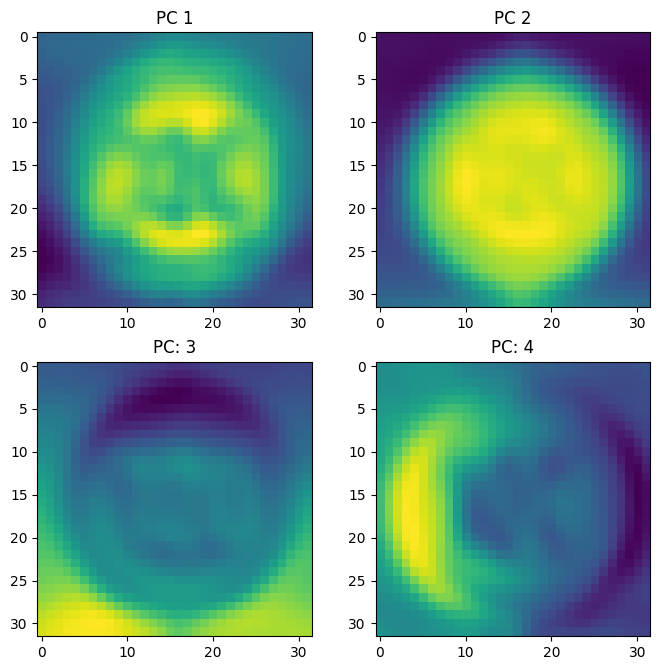

 best test accuracy : 0.8901960784313725


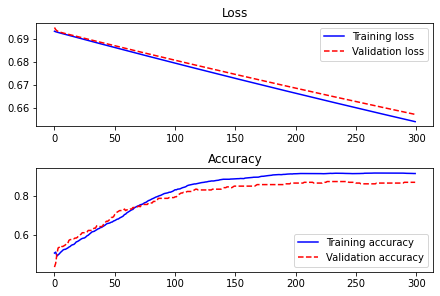

In [9]:
#train 50 epochs as opposed to 300
#learning rate
n_components = 200


pca = PCA(n_components)
projected = pca.fit_transform(train_data)
pca.plot_PC()

train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []

train_l = np.copy(train_label)//8 # 7 or 8
valid_l = np.copy(valid_label)//8 # 7 or 8
test_l = np.copy(test_label)//8 # 7 or 8

Alpha = 0.001
w = 0.1*np.random.rand(n_components)
b = 0.1*np.random.rand(1)
logistic = LogisticRegression(Alpha,n_components)
#weight
train_d = projected 
valid_d = pca.transform(valid_data)
test_d = pca.transform(test_data)
epochs = 300
for epoch in range(epochs):
    #logistic model 
    train_y = logistic.logistic_model(w, train_d,b)
    #loss check
    train_loss = logistic.loss_binary(train_y, train_l)
    #gradient check
    train_loss_record.append(train_loss)
    train_accuracy = logistic.check_accuracy(train_y, train_l)
    train_accuracy_record.append(train_accuracy)
    #process for validation sets only checking the accuray, not updating the weight
    holdout_y = logistic.logistic_model(w,valid_d,b)
    holdout_loss = logistic.loss_binary(holdout_y, valid_l)
    holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
    holdout_loss_record.append(holdout_loss)
    holdout_accuracy_record.append(holdout_accuracy)
    #evaluate best option for test sets
    
    if holdout_accuracy >= max(holdout_accuracy_record):
        best_w = w
        best_b = b
    #update the weight
    w,b = logistic.update_weight(w,b, train_d, train_y, train_l)
    
test_y = logistic.logistic_model(best_w, test_d, best_b)
test_accuracy = logistic.check_accuracy(test_y, test_l)    
        
print(f' best test accuracy : {test_accuracy }')
#plot result

fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.savefig('test2png.png', dpi=100)

axs[0].plot(train_loss_record, '-b', label='Training loss')
axs[0].plot(holdout_loss_record, '--r', label='Validation loss')
axs[0].legend();
axs[0].set_title('Loss')

axs[1].plot(train_accuracy_record, '-b', label='Training accuracy')
axs[1].plot(holdout_accuracy_record, '--r', label='Validation accuracy')
axs[1].legend();
axs[1].set_title('Accuracy')

plt.show()
   

#Q5 - (c) - Evaluate the model on Speed limit 100km/h vs 120km/h using the aligned dataset

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize,select_binarydata
from model.logistic import LogisticRegression

#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
X,Y = traffic_sign(True) # check true and false
#data normalize
train_data_normalized = X.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data_normalized) 
load_data = train_data_normalized, Y

load_data_binary = select_binarydata(load_data,7,8)
#data normalize


(34799, 1024) (34799,)


**********


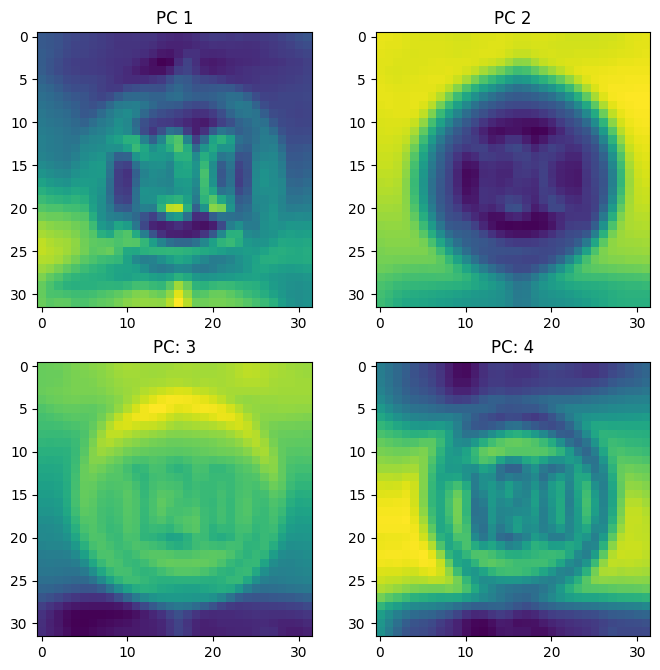

 epoch: 50, train accuracy: 0.85
 epoch: 100, train accuracy: 0.967156862745098
 epoch: 150, train accuracy: 0.9759803921568627
 epoch: 200, train accuracy: 0.9794117647058823
 epoch: 250, train accuracy: 0.9813725490196078
 epoch: 300, train accuracy: 0.9803921568627451
 best test accuracy : 0.984313725490196
**********
 epoch: 50, train accuracy: 0.9637254901960784
 epoch: 100, train accuracy: 0.9794117647058823
 epoch: 150, train accuracy: 0.9813725490196078
 epoch: 200, train accuracy: 0.9803921568627451
 epoch: 250, train accuracy: 0.9803921568627451
 epoch: 300, train accuracy: 0.9803921568627451
 best test accuracy : 0.9607843137254902
**********
 epoch: 50, train accuracy: 0.8995098039215687
 epoch: 100, train accuracy: 0.9789215686274509
 epoch: 150, train accuracy: 0.9857843137254902
 epoch: 200, train accuracy: 0.986764705882353
 epoch: 250, train accuracy: 0.9872549019607844
 epoch: 300, train accuracy: 0.9877450980392157
 best test accuracy : 0.9764705882352941
**********


In [17]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
train_accuracy_record = []
Alpha  = 0.0032
n_components = 200
epochs_print = [50, 100, 150, 200, 250, 300]
epochs = 300
k = 0

#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    w = 0.1*np.random.rand(n_components)
    b = 0.1*np.random.rand(1)

    train_loss_record.append([])
    holdout_loss_record.append([])

    #first_plot = True
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test
    

    pca = PCA(n_components)
    projected = pca.fit_transform(train_data)
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.transform(valid_data)
    test_d = pca.transform(test_data)
    train_l = np.copy(train_label)//8
    valid_l = np.copy(valid_label)//8
    test_l = np.copy(test_label)//8
    
    logistic = LogisticRegression(Alpha,n_components)
  
    for epoch in range(epochs):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d,b)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record[k].append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d,b)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record[k].append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        if holdout_accuracy >= max(holdout_accuracy_record):
            best_w = w
            best_b = b
            
        #update the weight
        w,b = logistic.update_weight(w,b,train_d, train_y, train_l)
    
        if (epoch + 1) in epochs_print:
            print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy}')
            
    test_y = logistic.logistic_model(best_w, test_d,best_b)
    test_accuracy = logistic.check_accuracy(test_y, test_l)            
    print(f' best test accuracy : {test_accuracy }')
    test_accuracy_record.append(test_accuracy)
    test_accuracy = []
    holdout_accuracy = []
    holdout_accuracy_record = []


    #update fold
    k = k+1

print(f' test_accuracy mean : {np.mean(test_accuracy_record)}')       


    

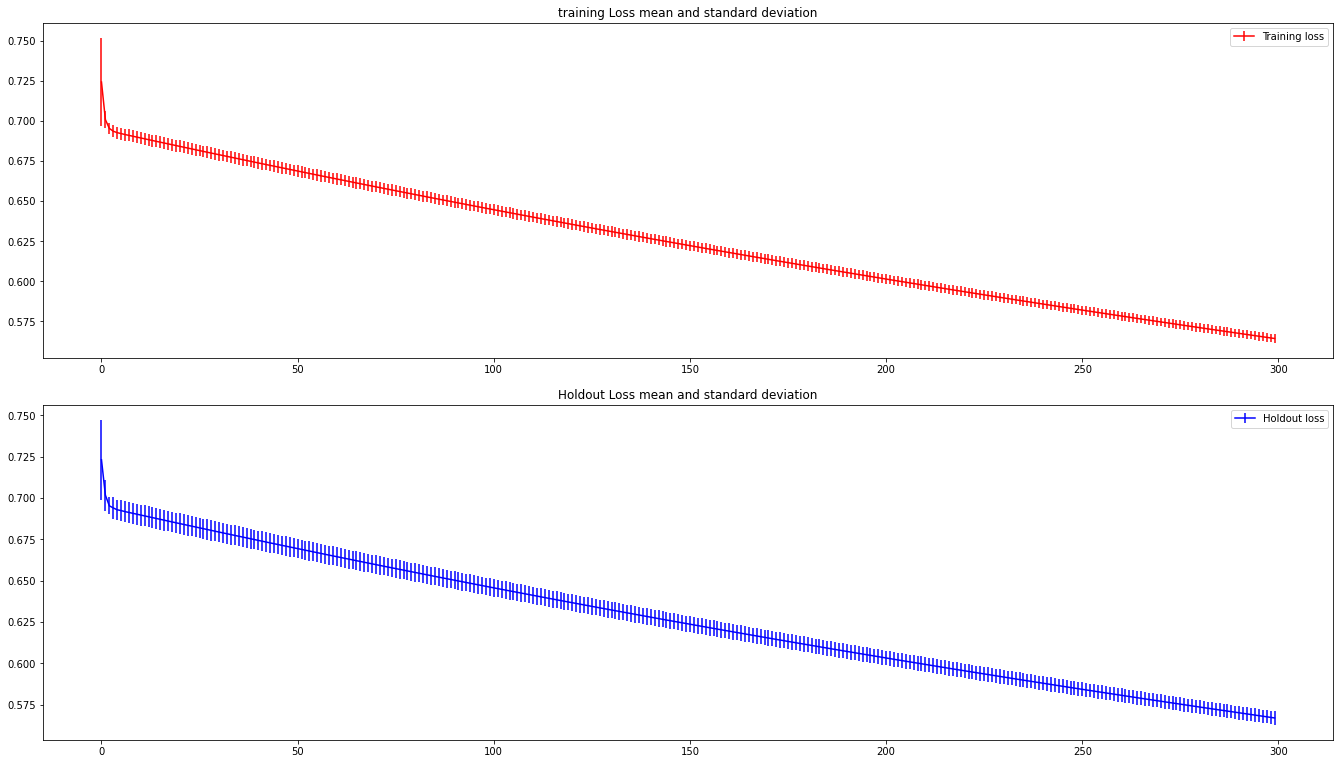

In [24]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

#axs[0].plot((np.mean(train_loss_record,axis=0)), '-b', label='Training loss')
yerr = np.std(train_loss_record,axis=0)
axs[0].errorbar(np.arange(epochs),np.mean(train_loss_record,axis=0),yerr=yerr,color = 'r', label='Training loss')
axs[0].legend();
axs[0].set_title('training Loss mean and standard deviation')

yerr = np.std(holdout_loss_record,axis=0)
axs[1].errorbar(np.arange(epochs),np.mean(holdout_loss_record,axis=0),yerr=yerr,color = 'b', label='Holdout loss')
axs[1].legend();
axs[1].set_title('Holdout Loss mean and standard deviation')
plt.show()

# standard deviation error bars.


In [118]:
#-(c) 3times simulation with different learning rate

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

(34799, 1024) (34799,)
**********


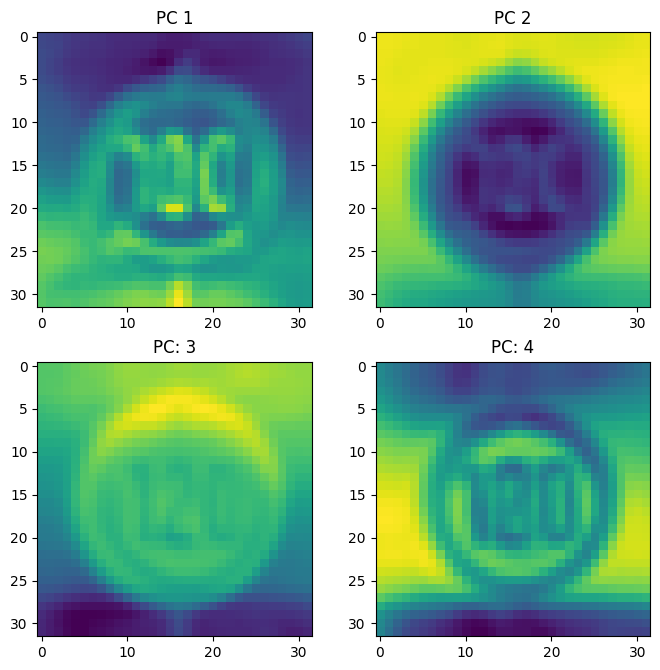

 learning rate : 0.01 ,k: 0, test accuracy : 0.9568627450980393
**********
 learning rate : 0.01 ,k: 1, test accuracy : 0.9607843137254902
**********
 learning rate : 0.01 ,k: 2, test accuracy : 0.9686274509803922
**********
 learning rate : 0.01 ,k: 3, test accuracy : 0.9686274509803922
**********
 learning rate : 0.01 ,k: 4, test accuracy : 0.9686274509803922
**********
 learning rate : 0.01 ,k: 5, test accuracy : 0.9725490196078431
**********
 learning rate : 0.01 ,k: 6, test accuracy : 0.9686274509803922
**********
 learning rate : 0.01 ,k: 7, test accuracy : 0.9764705882352941
1
**********
 learning rate : 0.01 ,k: 8, test accuracy : 0.9686274509803922
2
**********
 learning rate : 0.01 ,k: 9, test accuracy : 0.9529411764705882
 test_accuracy mean : 0.9662745098039215
**********


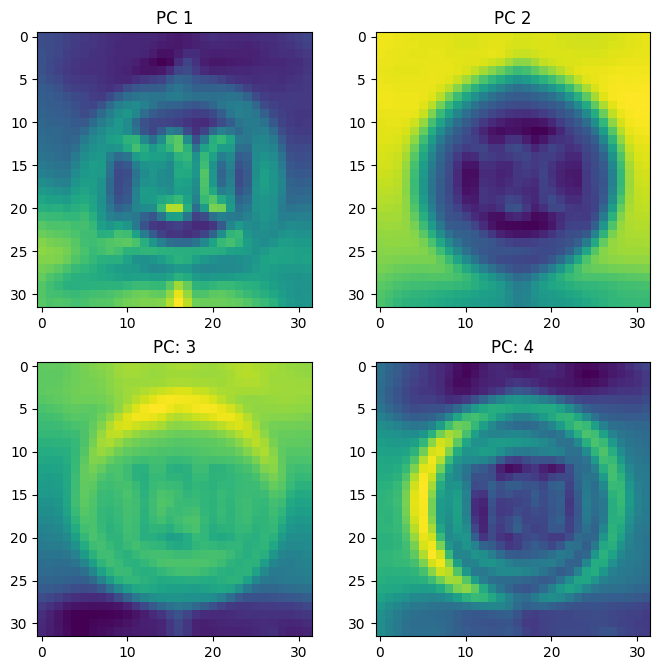

 learning rate : 0.0001 ,k: 0, test accuracy : 0.9294117647058824
**********
 learning rate : 0.0001 ,k: 1, test accuracy : 0.6470588235294118
**********
 learning rate : 0.0001 ,k: 2, test accuracy : 0.5843137254901961
**********
 learning rate : 0.0001 ,k: 3, test accuracy : 0.8784313725490196
**********
 learning rate : 0.0001 ,k: 4, test accuracy : 0.9372549019607843
**********
 learning rate : 0.0001 ,k: 5, test accuracy : 0.7803921568627451
**********
 learning rate : 0.0001 ,k: 6, test accuracy : 0.7568627450980392
**********
 learning rate : 0.0001 ,k: 7, test accuracy : 0.9176470588235294
1
**********
 learning rate : 0.0001 ,k: 8, test accuracy : 0.9333333333333333
2
**********
 learning rate : 0.0001 ,k: 9, test accuracy : 0.8862745098039215
 test_accuracy mean : 0.8250980392156864
**********


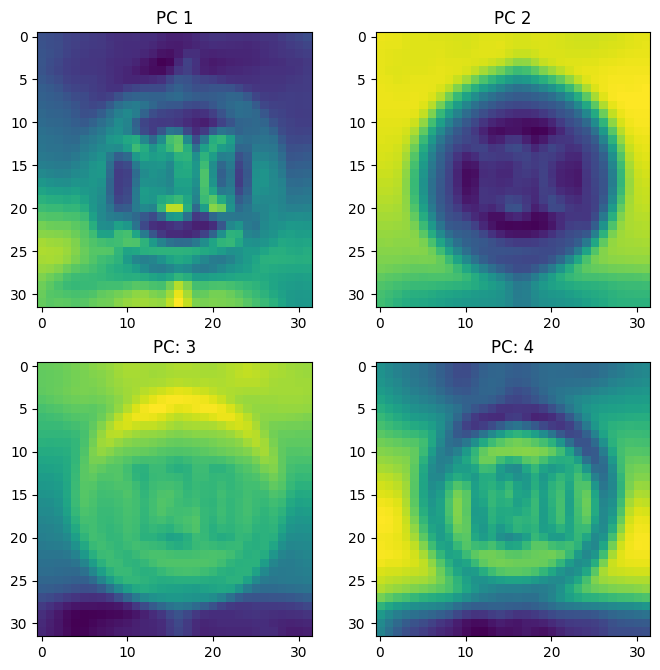

 learning rate : 0.003 ,k: 0, test accuracy : 0.9568627450980393
**********
 learning rate : 0.003 ,k: 1, test accuracy : 0.9725490196078431
**********
 learning rate : 0.003 ,k: 2, test accuracy : 0.9764705882352941
**********
 learning rate : 0.003 ,k: 3, test accuracy : 0.9647058823529412
**********
 learning rate : 0.003 ,k: 4, test accuracy : 0.9568627450980393
**********
 learning rate : 0.003 ,k: 5, test accuracy : 0.9725490196078431
**********
 learning rate : 0.003 ,k: 6, test accuracy : 0.9686274509803922
**********
 learning rate : 0.003 ,k: 7, test accuracy : 0.9607843137254902
1
**********
 learning rate : 0.003 ,k: 8, test accuracy : 0.9882352941176471
2
**********
 learning rate : 0.003 ,k: 9, test accuracy : 0.9490196078431372
 test_accuracy mean : 0.9666666666666668


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize,select_binarydata
from model.logistic import LogisticRegression

#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
X,Y = traffic_sign(True) # check true and false
#data normalize
train_data_normalized = X.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data_normalized) 
load_data = train_data_normalized, Y

load_data_binary = select_binarydata(load_data,7,8)
#data normalize
train_loss_record_all = []
# learning rate
lrs = [0.01, 0.0001,0.003]

for lr in range(np.size(lrs)) : 
    Alpha = lrs[lr]
    train_loss_record = []
    holdout_loss_record = []
    holdout_accuracy_record = []
    test_accuracy_record = []
    train_accuracy_record = []
    n_components = 200
    epochs_print = [50, 100, 150, 200, 250, 300,1000]
    epochs = 1000
    k = 0

    #fold sets add
    first_plot = True
    for train, valid, test in generate_k_fold_set((load_data_binary)):
        print("**********")
        w = 0.1*np.random.rand(n_components)
        d = 0.1*np.random.rand(1)

        train_loss_record.append([])
        holdout_loss_record.append([])

        #first_plot = True
        train_data, train_label = train
        valid_data, valid_label = valid
        test_data, test_label = test


        pca = PCA(n_components)
        projected = pca.fit_transform(train_data)
        #plot first principle component
        if first_plot == True : 
            pca.plot_PC()
            first_plot = False
        train_d = projected     
        valid_d = pca.transform(valid_data)
        test_d = pca.transform(test_data)
        train_l = np.copy(train_label)//8
        valid_l = np.copy(valid_label)//8
        test_l = np.copy(test_label)//8

        logistic = LogisticRegression(Alpha,n_components)

        for epoch in range(epochs):
            #logistic model 
            train_y = logistic.logistic_model(w, train_d,b)
            #loss check
            train_loss = logistic.loss_binary(train_y, train_l)
            #gradient check
            train_loss_record[k].append(train_loss)
            train_accuracy = logistic.check_accuracy(train_y, train_l)
            train_accuracy_record.append(train_accuracy)
            #process for validation sets only checking the accuray, not updating the weight
            holdout_y = logistic.logistic_model(w,valid_d,b)
            holdout_loss = logistic.loss_binary(holdout_y, valid_l)
            holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
            holdout_loss_record[k].append(holdout_loss)
            holdout_accuracy_record.append(holdout_accuracy)
            #evaluate best option for test sets
            if holdout_accuracy >= max(holdout_accuracy_record):
                best_w = w
                best_b = b

            #update the weight
            w,b = logistic.update_weight(w,b,train_d, train_y, train_l)

            #if (epoch + 1) in epochs_print:
             #   print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy}')

        test_y = logistic.logistic_model(best_w, test_d,best_b)
        test_accuracy = logistic.check_accuracy(test_y, test_l)
        print(f' learning rate : {Alpha} ,k: {k}, test accuracy : {test_accuracy }')


        test_accuracy_record.append(test_accuracy)
        test_accuracy = []
        holdout_accuracy = []
        holdout_accuracy_record = []


        #update fold
        k = k+1

    print(f' test_accuracy mean : {np.mean(test_accuracy_record)}')       

    train_loss_record_all.append(train_loss_record)
    





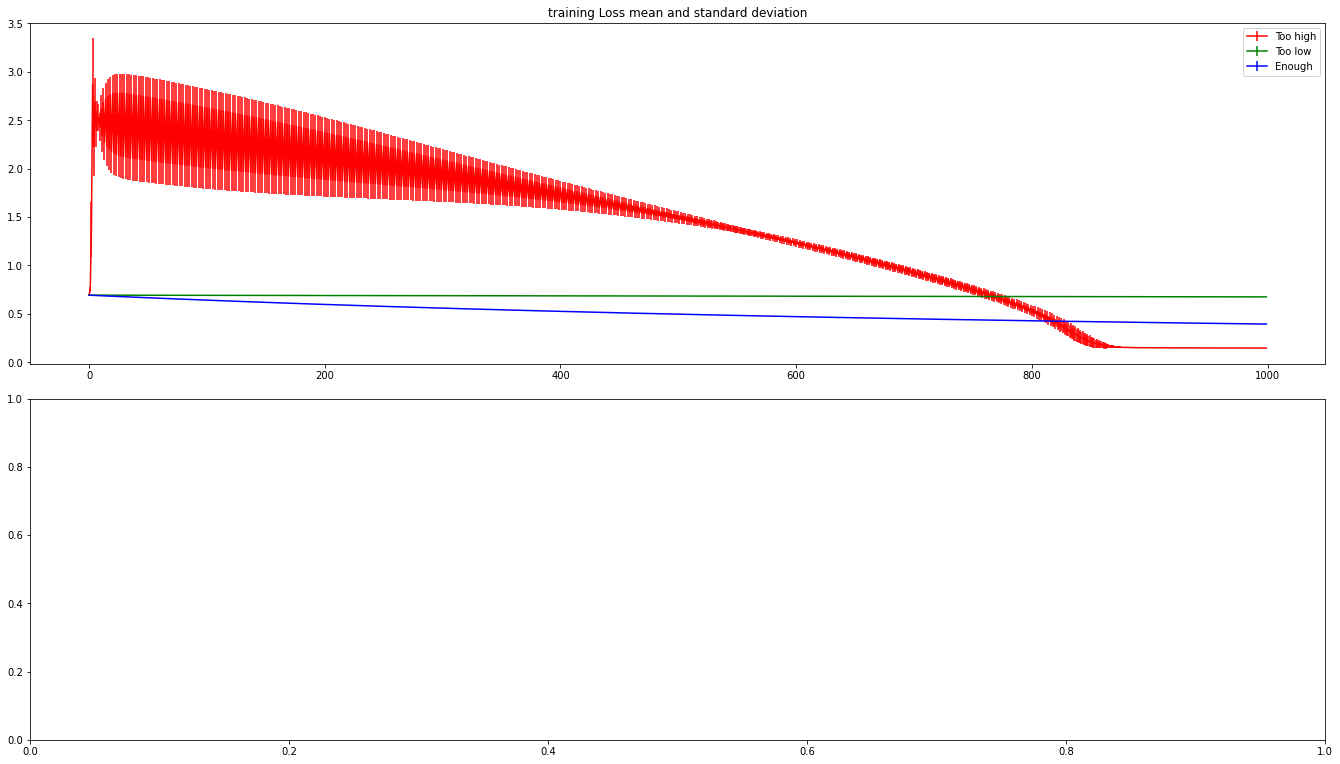

In [19]:
#plot training setss
fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)

yerr1 = np.std(train_loss_record_all[0],axis=0)
yerr2 = np.std(train_loss_record_all[1],axis=0)
yerr3 = np.std(train_loss_record_all[2],axis=0)

axs[0].errorbar(np.arange(epochs),np.mean(train_loss_record_all[0],axis=0),yerr=yerr1,color = 'r', label='Too high')
axs[0].errorbar(np.arange(epochs),np.mean(train_loss_record_all[1],axis=0),yerr=yerr2,color = 'g', label='Too low ')
axs[0].errorbar(np.arange(epochs),np.mean(train_loss_record_all[2],axis=0),yerr=yerr3,color = 'b', label='Enough ')
axs[0].legend();
axs[0].set_title('training Loss mean and standard deviation')

plt.show()

# standard deviation error bars.


In [ ]:
##Q5 - (d) - Evaluate the model on Curve Left(19) vs Right(20) using the aligned dataset

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize
from model.logistic import LogisticRegression

#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
X,Y = traffic_sign(True) # check true and false
#data normalize
train_data_normalized = X.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data_normalized) 


load_data = train_data_normalized, Y
load_data_binary = select_binarydata(load_data,19,20)
#data normalize


(34799, 1024) (34799,)


**********


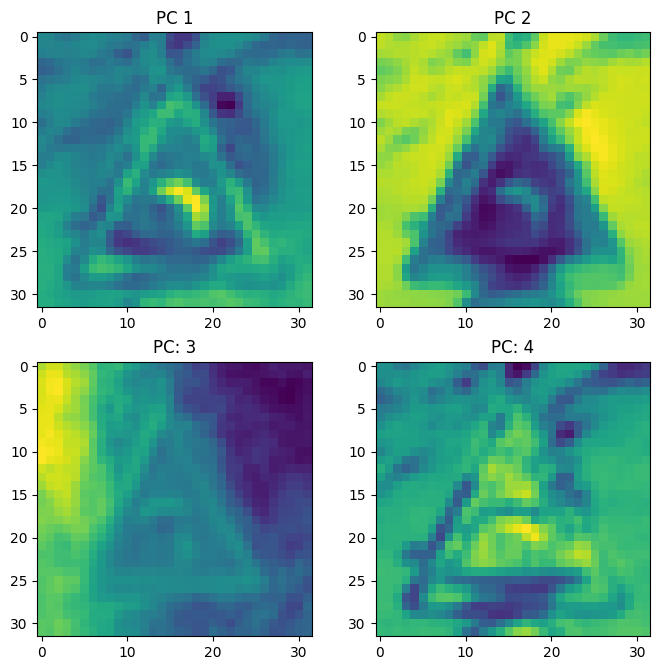

 epoch: 50, train accuracy: 0.6119791666666666
 epoch: 100, train accuracy: 0.6119791666666666
 epoch: 150, train accuracy: 0.625
 epoch: 200, train accuracy: 0.734375
 epoch: 250, train accuracy: 0.875
 epoch: 300, train accuracy: 0.8984375
 epoch: 500, train accuracy: 0.921875
 best test accuracy : 0.875
**********
 epoch: 50, train accuracy: 0.6145833333333334
 epoch: 100, train accuracy: 0.6145833333333334
 epoch: 150, train accuracy: 0.6276041666666666
 epoch: 200, train accuracy: 0.7239583333333334
 epoch: 250, train accuracy: 0.8567708333333334
 epoch: 300, train accuracy: 0.9010416666666666
 epoch: 500, train accuracy: 0.921875
 best test accuracy : 0.9166666666666666
**********
 epoch: 50, train accuracy: 0.6328125
 epoch: 100, train accuracy: 0.6328125
 epoch: 150, train accuracy: 0.6328125
 epoch: 200, train accuracy: 0.6614583333333334
 epoch: 250, train accuracy: 0.7994791666666666
 epoch: 300, train accuracy: 0.8932291666666666
 epoch: 500, train accuracy: 0.9427083333333

In [24]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
train_accuracy_record = []
Alpha  = 0.004
n_components = 200
epochs_print = [50, 100, 150, 200, 250, 300,500]
epochs = 500
k = 0

#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    w = 0.1*np.random.rand(n_components)
    b = 0.1*np.random.rand(1)

    train_loss_record.append([])
    holdout_loss_record.append([])

    #first_plot = True
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test
    

    pca = PCA(n_components)
    projected = pca.fit_transform(train_data)
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.transform(valid_data)
    test_d = pca.transform(test_data)
    train_l = np.copy(train_label)//20
    valid_l = np.copy(valid_label)//20
    test_l = np.copy(test_label)//20
    
    logistic = LogisticRegression(Alpha,n_components)
  
    for epoch in range(epochs):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d,b)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record[k].append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d,b)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record[k].append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        if holdout_accuracy >= max(holdout_accuracy_record):
            best_w = w
            best_b = b
            
        #update the weight
        w,b = logistic.update_weight(w,b,train_d, train_y, train_l)
    
        if (epoch + 1) in epochs_print:
            print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy}')
            
    test_y = logistic.logistic_model(best_w, test_d,best_b)
    test_accuracy = logistic.check_accuracy(test_y, test_l)            
    print(f' best test accuracy : {test_accuracy }')
    test_accuracy_record.append(test_accuracy)
    test_accuracy = []
    holdout_accuracy = []
    holdout_accuracy_record = []


    #update fold
    k = k+1

print(f' test_accuracy mean : {np.mean(test_accuracy_record)}')       


    

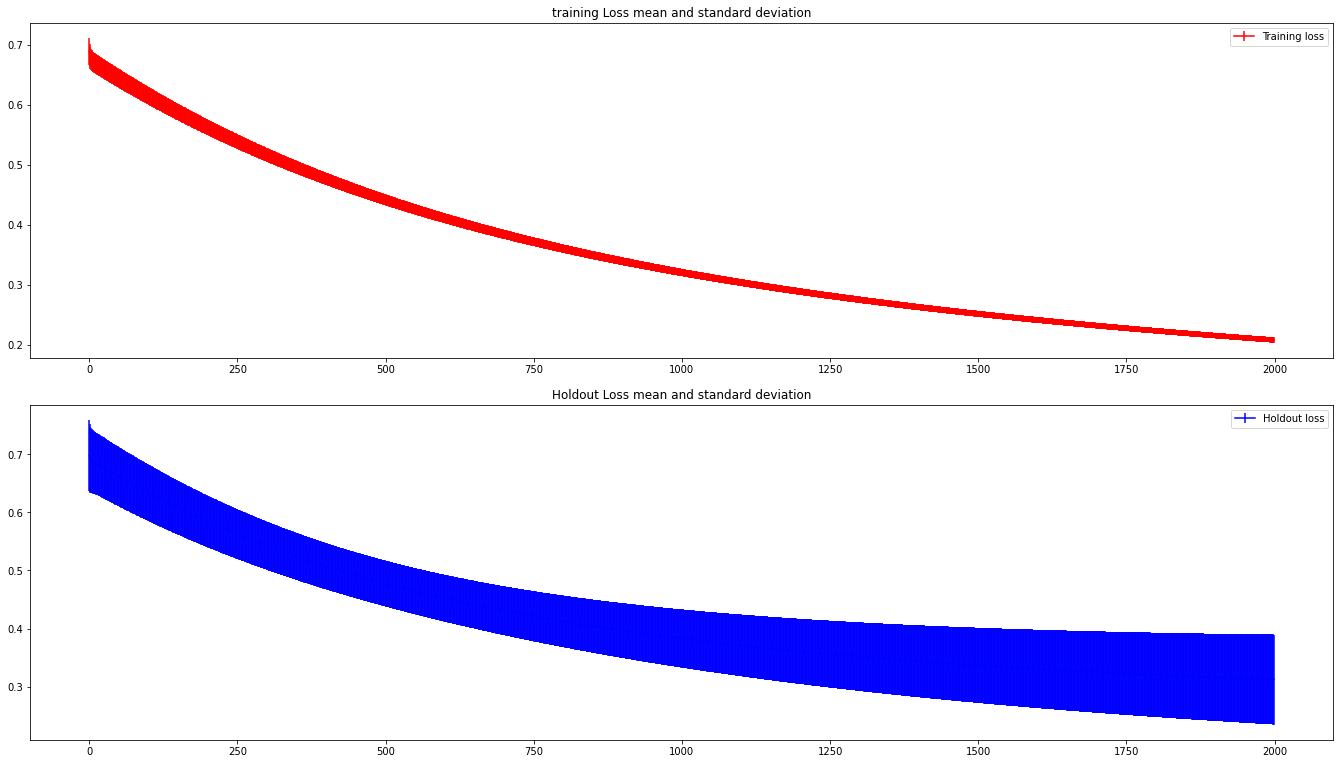

In [33]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

#axs[0].plot((np.mean(train_loss_record,axis=0)), '-b', label='Training loss')
yerr = np.std(train_loss_record,axis=0)
axs[0].errorbar(np.arange(epochs),np.mean(train_loss_record,axis=0),yerr=yerr,color = 'r', label='Training loss')
axs[0].legend();
axs[0].set_title('training Loss mean and standard deviation')

yerr = np.std(holdout_loss_record,axis=0)
axs[1].errorbar(np.arange(epochs),np.mean(holdout_loss_record,axis=0),yerr=yerr,color = 'b', label='Holdout loss')
axs[1].legend();
axs[1].set_title('Holdout Loss mean and standard deviation')
plt.show()

# standard deviation error bars.


In [ ]:
##Extra Credit for balancing datasets

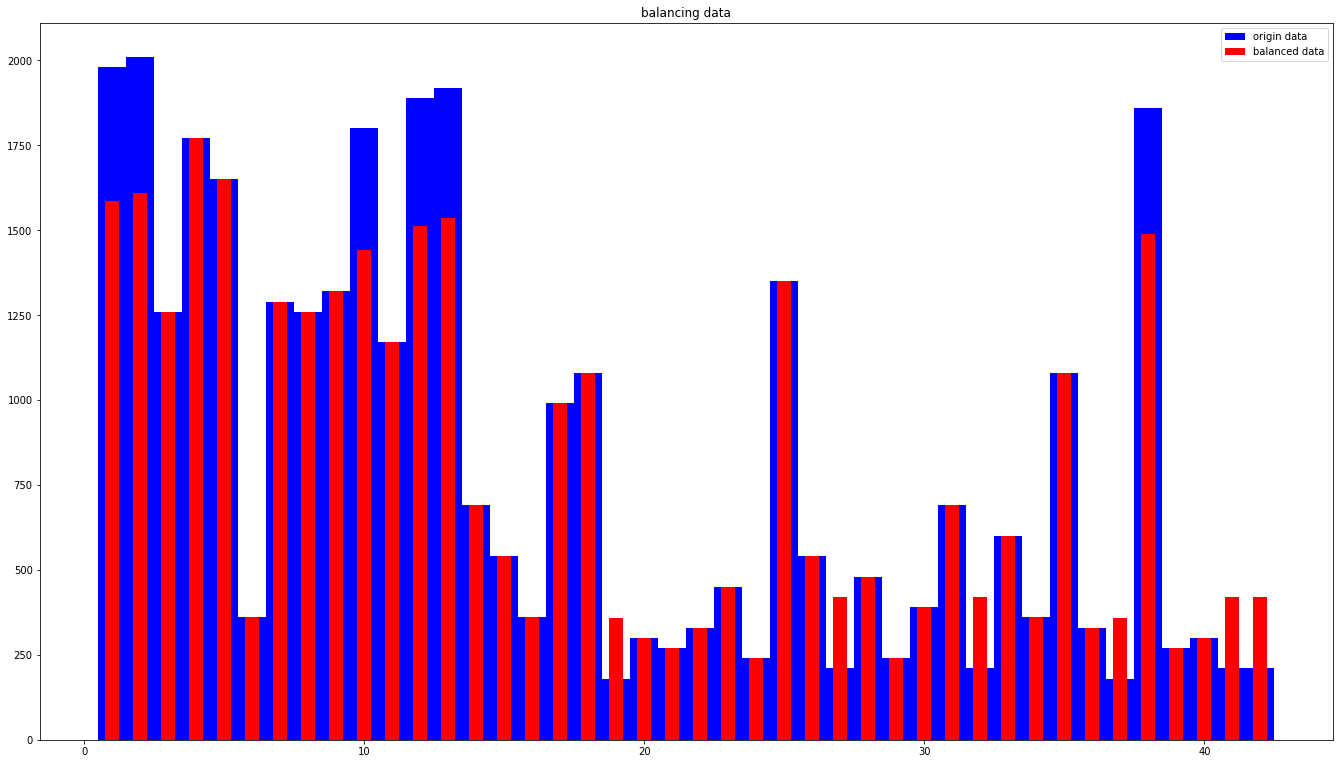

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize,select_binarydata
from model.logistic import LogisticRegression

#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
X,Y = traffic_sign(True) # check true and false
#data normalize
train_data_normalized = X.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data_normalized) 
load_data = train_data_normalized, Y
#data normalize

def balance_data(dataset):
    Data, labels = dataset
    #top 6 image sets drop -> lowest 6 image sets duplicate
    cnt_array = np.bincount(labels)
    
    # sort. higher data remove, find top 5 
    top5 = (cnt_array.argsort()[-6:][::-1])
    for i in range(np.size(top5)):
        # 5 higher data remove 5%, 5 lowest data duplicate
        idx_high = np.where(labels == top5[i])
        k = np.array(idx_high)[0,1:np.size(idx_high)//5] 
        Data = np.delete(Data,  k)
        labels = np.delete(labels,  k)
      
    # sort. higher data remove, find top 5 
    low5 = (cnt_array.argsort()[1:7][::-1])
    

    for i in range(np.size(low5)):
        # 5 higher data remove 5%, 5 lowest data duplicate
        idx_low = np.where(labels == low5[i])
        k = np.array(idx_low)[0,1:np.size(idx_low)//1]
        Data = np.concatenate([Data[:],  Data[k]])
        labels = np.concatenate([labels[:], labels[k]])
         
    cnt_array_balance = np.bincount(labels)
   
    return   cnt_array, cnt_array_balance

origin, new = balance_data(load_data)
k = np.arange(42) + 1

fig, axs = plt.subplots(1, 1, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)

axs.bar(k,origin[k],color = 'b',label = 'origin data',width = 1)
axs.bar(k,new[k],color = 'r',label = 'balanced data',width = 0.5)
axs.legend();
axs.set_title('balancing data')

plt.show()



In [11]:
label

array([1, 1, 1, ..., 2, 2, 2], dtype=uint8)